In [38]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [39]:
feature_names = None
features_to_use = [2, 4, 5, 6, 7, 9]
categorical_features = [2, 4, 7]

target_idx = 1
dataset_folder = train_path = "../../../datasets/titanic/"
discretize = True
balance = True

def filter_fn(data):
  df = pd.DataFrame(data)

  df.dropna(inplace=True)
  ###
  return df.values.astype('|S128')

dataset = utils.load_csv_dataset(
            os.path.join(dataset_folder, 'train.csv'), target_idx, ',',
            feature_names=feature_names, features_to_use=features_to_use,
            categorical_features=categorical_features, discretize=discretize,
            balance=balance, filter_fn = filter_fn, skip_first=True)

In [40]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils
from importlib import reload
reload(ae)
reload(dataset_manager)
reload(testbench)
reload(utils)
import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 200
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print(dm.space_size())
explainer = ae.ArgTabularExplainer(dm, 'titanic_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
tb = testbench.Testbench(dm)

# tb.explore_full_dataset(16)
# tb.explore_neighborhoods(16)

Train 0.915
Test 0.8260869565217391
2016
titanic_200
Total number of arguments:  164
Saving to  ../../saves\titanic_200_minimals.df


In [41]:
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'titanic_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))

Train 0.8921389396709324
Test 0.9420289855072463
titanic_54
Total number of arguments:  93
Saving to  ../../saves\titanic_54_minimals.df
edges per node: 16.365591397849464
nodes: 93
edges: 761
titanic_108
Total number of arguments:  118
Saving to  ../../saves\titanic_108_minimals.df
edges per node: 13.898305084745763
nodes: 118
edges: 820
titanic_162
Total number of arguments:  139
Saving to  ../../saves\titanic_162_minimals.df
edges per node: 14.100719424460431
nodes: 139
edges: 980
titanic_216
Total number of arguments:  154
Saving to  ../../saves\titanic_216_minimals.df
edges per node: 14.194805194805195
nodes: 154
edges: 1093
titanic_270
Total number of arguments:  155
Saving to  ../../saves\titanic_270_minimals.df
edges per node: 15.109677419354838
nodes: 155
edges: 1171
titanic_324
Total number of arguments:  154
Saving to  ../../saves\titanic_324_minimals.df
edges per node: 13.96103896103896
nodes: 154
edges: 1075
titanic_378
Total number of arguments:  163
Saving to  ../../save

[820, 980, 1093, 1171, 1075, 1168, 1219, 1194, 1437, 761]
(54, 108, 162, 216, 270, 324, 378, 432, 486, 547)
(93, 118, 139, 154, 155, 154, 163, 167, 167, 187)


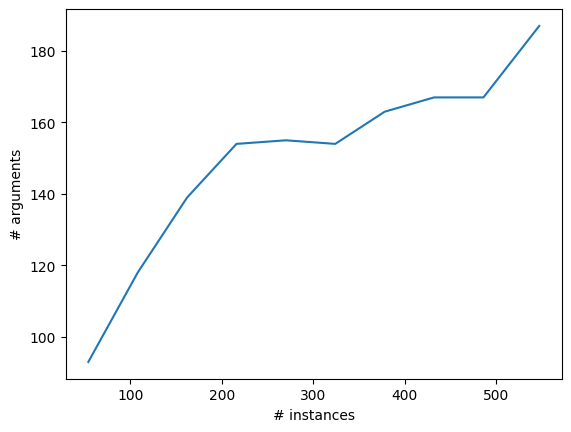

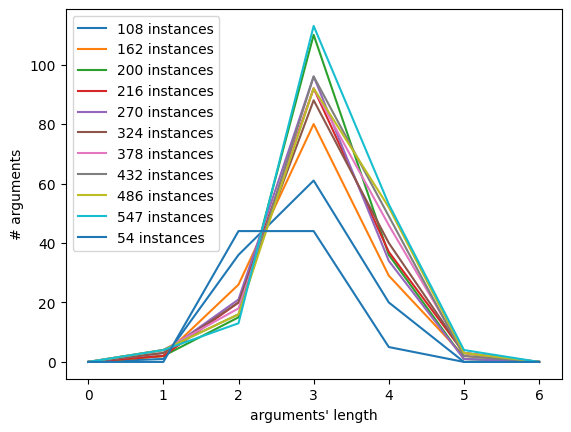

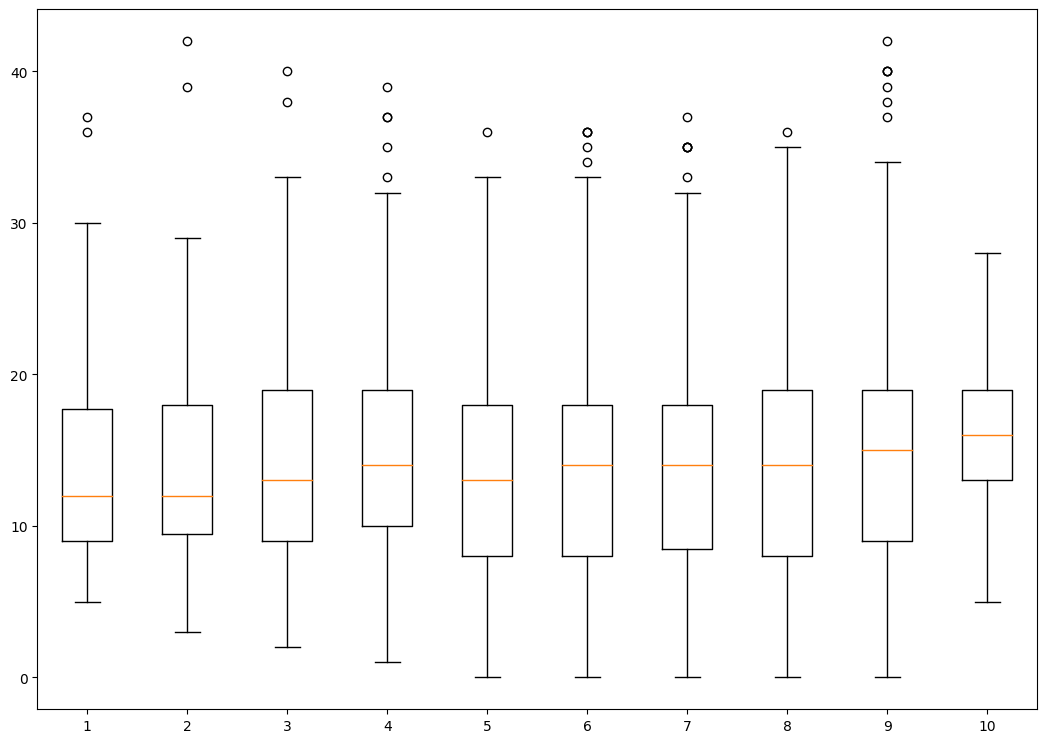

(547, 486, 432, 378, 324, 270, 216, 162, 108, 54) (0.005347593582887722, 0.005988023952095856, 0.005988023952095856, 0.006134969325153339, 0.012987012987012991, 0.0, 0.0, 0.0, 0.0, 0.0)


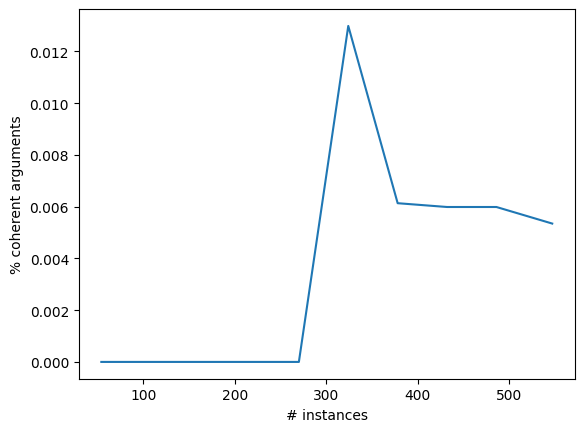

In [42]:
explainer.af_analysis(remove='')

In [37]:
G = explainer.build_attack_graph(compute=False, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
print('nodes:', len(G.nodes()))

explainer.export_graph('asp', '../../saves')

edges per node: 14.88135593220339
nodes: 118


[573, 542, 0, 382, 454, 243, 311, 122, 166, 0, 0, 2392, 3808, 3747, 2417, 3727, 3315, 2023, 3301, 2738, 1309, 3123, 2412, 945, 2406, 1828, 789, 1907, 1550, 700, 1525, 1377, 1317, 426, 1205, 1078, 377, 929, 875, 2748, 3111, 239, 734, 685]
(72, 90, 90, 144, 180, 180, 216, 270, 270, 288, 360, 360, 432, 450, 450, 504, 540, 540, 576, 630, 630, 648, 720, 720, 792, 810, 810, 864, 900, 900, 936, 990, 990, 1080, 1080, 1152, 1170, 1170, 1260, 1260, 1350, 1350, 1440, 1440) (165, 235, 258, 302, 374, 376, 349, 441, 468, 359, 491, 518, 356, 530, 578, 345, 509, 570, 340, 523, 558, 338, 517, 541, 315, 490, 519, 313, 479, 496, 276, 455, 483, 427, 458, 224, 406, 426, 380, 397, 339, 356, 298, 319)


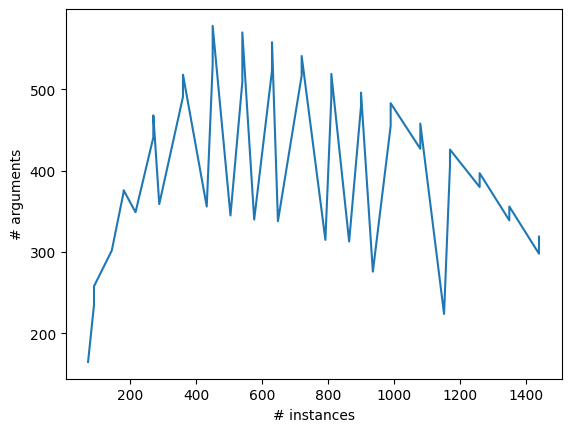

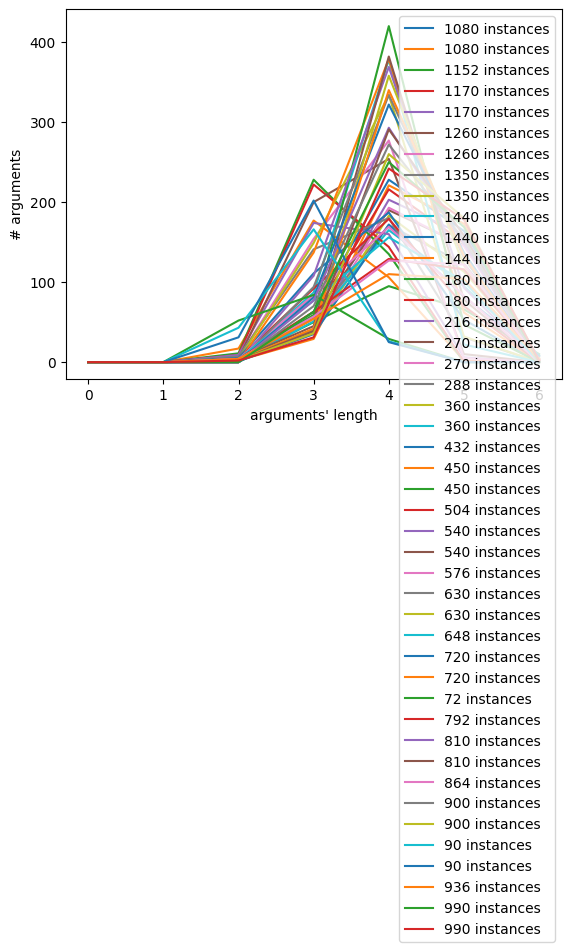

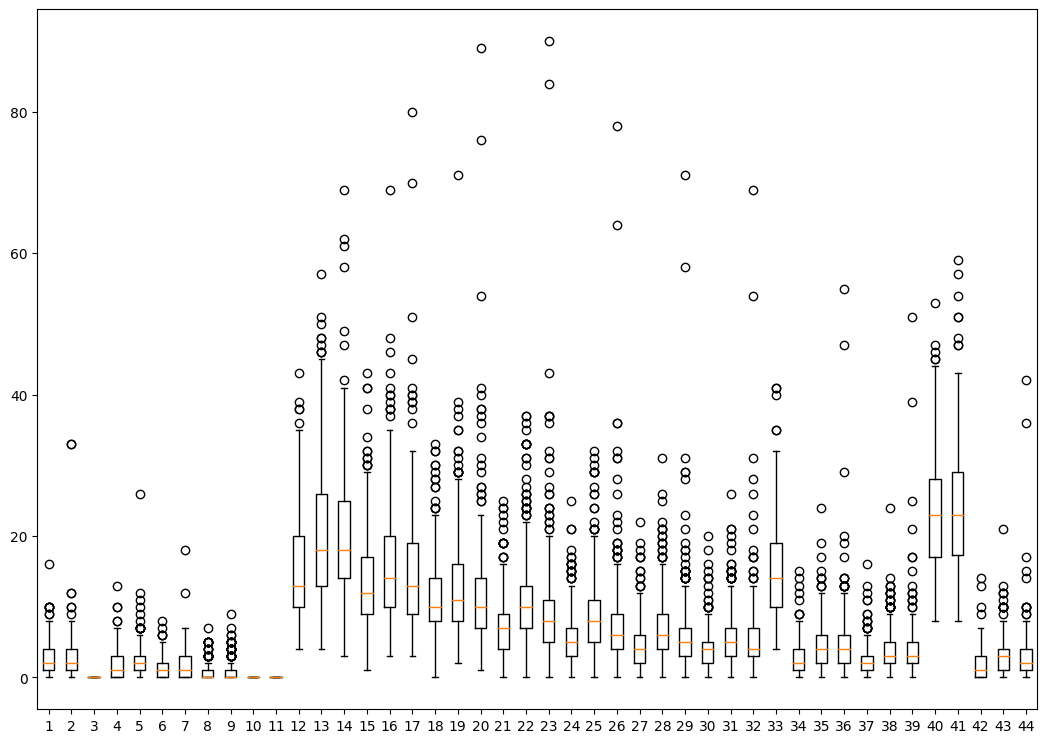

(1440, 1440, 1350, 1350, 1260, 1260, 1170, 1170, 1152, 1080, 1080, 990, 990, 936, 900, 900, 864, 810, 810, 792, 720, 720, 648, 630, 630, 576, 540, 540, 504, 450, 450, 432, 360, 360, 288, 270, 270, 216, 180, 180, 144, 90, 90, 72) (1.0, 1.0, 0.6151685393258427, 0.5073746312684366, 0.3929471032745592, 0.3263157894736842, 0.2699530516431925, 0.20443349753694584, 1.0, 0.1746724890829694, 0.16393442622950816, 0.1208791208791209, 0.10351966873706009, 0.28260869565217395, 0.08141962421711901, 0.07459677419354838, 0.1565495207667732, 0.06734693877551023, 0.036608863198458574, 0.13650793650793647, 0.03481624758220503, 0.02218114602587795, 0.047337278106508895, 0.02294455066921608, 0.005376344086021501, 0.03529411764705881, 0.017681728880157177, 0.0035087719298245723, 0.023188405797101463, 0.009433962264150941, 0.0034602076124568004, 0.008426966292134797, 0.0, 0.0, 0.0027855153203342198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)


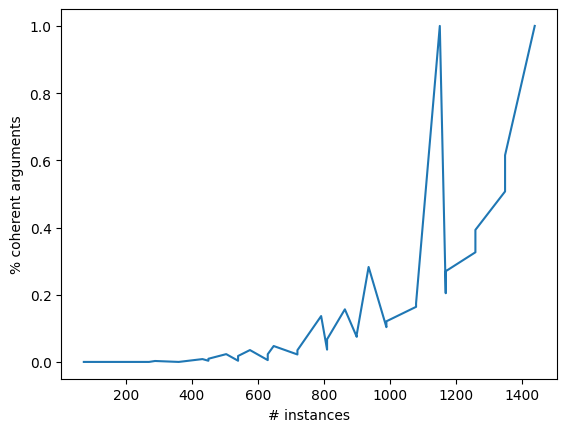

In [57]:
explainer.af_analysis(remove=['100', '200','300', '400', '500', '600', '700', '800'])
#explainer.af_analysis(remove=['synth'])

In [ ]:
import testbench
tb = testbench.TestBench()

In [25]:
from typing import OrderedDict
import networkx as nx
from sklearn import preprocessing
import random
from itertools import combinations

le = preprocessing.LabelEncoder()
#print(explainer.categorical_names)
#print(explainer.categorical_features)
#print(explainer.ordinal_features)
#le.set_params(explainer.feature_names)

def generate_full_dataset():
    instance = OrderedDict.fromkeys(dm.feature_names)
    full_dataset = []
    def gen_rec(instance, columns, col_index, full_dataset):
        inst_ = instance.copy()
        if col_index == len(columns) - 1:
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                full_dataset.append(list(inst_.values()))
        else:
            inst_ = instance.copy()
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                gen_rec(inst_, columns, col_index + 1, full_dataset)

    gen_rec(instance, list(instance.keys()), 0, full_dataset)
    return full_dataset

def generate_full_neighborhood(origin, depth):
    #instance = OrderedDict.fromkeys(explainer.dataset.columns)
    instance = origin.copy()
    nbh_list = []

    def gen_rec(cols_, nbh_list):
        nbhs = []
        for nbh in nbh_list:
            for f in explainer.features_p_col[cols_[0]]:
                # create a new instance with each value for the column
                current_value = explainer.feature_names[f][len(cols_[0])+1:]
                if current_value != origin[cols_[0]]:
                    inst_ = nbh.copy()
                    inst_[cols_[0]] = current_value
                    nbhs.append(inst_)
        if len(cols_) > 1:
            nbhs = gen_rec(cols_[1:], nbhs)
        return nbhs
                
    for cols_ in combinations(list(instance.keys()), depth):
        nbh_list += gen_rec(cols_, [instance])
    nlist = []
    for nbh in nbh_list:
        nlist.append(list(nbh.values()))
    return nlist

def generate_instance_random(constraints):
    instance = OrderedDict.fromkeys(explainer.dataset.columns)
    for f in constraints:
        col=explainer.col_p_feature[f]
        instance[col] = explainer.feature_names[f].split('_')[1]
        fill_instance(instance, 'random')
    return list(instance.values())

def fill_instance(instance, strategy):
    if strategy == 'random':
        # fill the instance with a random values sampled from baseline dataset
        for i_, col in enumerate(instance.keys()):
            if instance[col] is None:
                instance[col] = explainer.dataset[col].sample(1, random_state=1).values[0]
    elif strategy == 'most_frequent':
        # fill the instance with the most frequent value for each column
        for k, i_ in enumerate(instance.keys()):
            if instance[k] is None:
                instance[k] = explainer.dataset[i_].value_counts().index[0]
    
def instance2encoded(instance, dataset):
    encoded = []
    print('cat f', dataset.categorical_features)
    print('cat names', dataset.categorical_names)

    for col in dataset.categorical_features:
        encoded.append(dataset.categorical_names[col].index(instance[col]))
    return np.array(encoded)

def extend_dataset(G, dataset_t, y_t):
    # attackers = []
    # print(G.degree)
    # for v, deg in G.degree:
    #     if deg > 0:
    #         attackers += G.edges(v)
    # print('len attackers:', len(attackers))
    # print(attackers[0])
    # # predict new data
    # transformed_data_plus = []
    # y_plus = []
    # print("Generating " + str(len(attackers)) + " new data...")
    # addition_set = set([tuple(i) for i in dataset_t])
    # for a in attackers:
    #     # print(a, [explainer.feature_names[k] for k in a[1]])
    #     inst = generate_instance_random(set.union(set(a[0]), set(a[1])))
    #     if tuple(inst) not in addition_set:
    #         addition_set.add(tuple(inst))
    #         transformed_data_plus.append(inst)
    #         y_plus.append(c.predict(instance2encoded(inst, dataset).reshape(1, -1))[0])
    # print(str(len(transformed_data_plus)) + " instances added")
    # print(str(len(y_plus)) + " instances predicted")

    full_dataset = generate_full_dataset()
    transformed_data_plus = full_dataset
    encoded_data_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    y_plus = encoded_data_plus
    train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    
    dataset_t += transformed_data_plus
    y_t += y_plus
    print('total length', len(dataset_t), len(y_t))
    train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)
    #print(train_data_plus.shape)
    #print(y_plus)
    explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'adult_' + str(nb_vals) + '_extended', compute=True, output_path='../saves')

    G = explainer.build_attack_graph(compute=True, display_graph=True)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    return G, dataset_t, y_t

def explore_full_dataset(nb_steps):
    full_dataset = dm.generate_full_dataset()
    y_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    #train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    random.seed(1)
    indices = list(range(len(full_dataset)))
    random.shuffle(indices)
    full_dataset_shuff = [full_dataset[i] for i in indices] 
    y_plus_shuff = [y_plus[i] for i in indices]

    print(np.unique(np.array(y_plus_shuff)))
    
    step_len = len(full_dataset)//nb_steps
    steps = [i*step_len for i in range(1, nb_steps)]
    steps.append(len(full_dataset))
    for nb_vals in steps:
        dataset_t = full_dataset_shuff[:nb_vals]
        y_t = y_plus_shuff[:nb_vals]
        print('total length', len(dataset_t), len(y_t))
        train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)

        explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'titanic_' + str(nb_vals) + '_synth', compute=True, output_path='../saves')

        G = explainer.build_attack_graph(compute=True, display_graph=False)
        print('total args:', len(G.nodes()))
        print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))


def data2origin(instance):
    origin = OrderedDict.fromkeys(explainer.dataset.columns)
    for k, v in zip(explainer.dataset.columns, instance):
        #print(k, v, explainer.features_p_col[k])
        fk = list(explainer.features_p_col[k])[int(v)] # feature key in features_p_col
        origin[k] = explainer.feature_names[fk][len(str(k))+1:]
    return origin


def remove_duplicates(list_):
    new_list = []
    for i in list_:
        if i not in new_list:
            new_list.append(i)
    print('duplicates', len(list_)-len(new_list))
    return new_list


def generate_neighborhoods(dataset, depth):
    nbh_dataset = []
    print('Generating ' + str(nb_rows) + ' neighborhoods...')
    for inst_ in dataset:
        try:
            origin = data2origin(inst_)
            nbh_dataset += generate_full_neighborhood(origin, depth)
        except:
            print('error', inst_)
    return nbh_dataset

def explore_neighborhoods(nb_steps):
    
    origin_dataset = dataset.train[:nb_rows]
    nbh_dataset = []
    random.seed(1)
    
    # set up experiments datasets length
    len_max = len(dm.generate_full_dataset())
    print('len_max', len_max)
    step_len =  len_max // nb_steps
    steps = [i*step_len for i in range(1, nb_steps)]
    steps.append(len_max)
    print(steps)
    
    depth = 0
    for nb_vals in steps:
        #generate nbh dataset with enough data
        while len(nbh_dataset) < nb_vals:
            print(len(nbh_dataset), nb_vals)
            depth += 1
            nbh_dataset += generate_neighborhoods(origin_dataset, depth)
            nbh_dataset = remove_duplicates(nbh_dataset)
    
        y_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in nbh_dataset]
        #train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
        
        indices = list(range(len(nbh_dataset)))
        random.shuffle(indices)
        nbh_dataset_shuff = [nbh_dataset[i] for i in indices] 
        y_plus_shuff = [y_plus[i] for i in indices]

        print(np.unique(np.array(y_plus_shuff)))

        dataset_t = nbh_dataset_shuff[:nb_vals]
        y_t = y_plus_shuff[:nb_vals]
        print('total length', len(dataset_t), len(y_t))
        train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)

        explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'titanic_' + str(nb_vals) + '_synth_nbh', compute=True, output_path='../../saves')

        G = explainer.build_attack_graph(compute=True, display_graph=False)
        print('total args:', len(G.nodes()))
        print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explore_full_dataset(16)
#explore_neighborhoods(16)

cat f [0, 1, 2, 3, 4, 5]
cat names {0: ['1', '2', '3'], 1: ['female', 'male'], 4: ['0', '1', '2', '3', '4', '5', '6'], 2: ['Age <= 6.00', '6.00 < Age <= 24.00', '24.00 < Age <= 35.00', 'Age > 35.00'], 3: ['SibSp <= 0.00', '0.00 < SibSp <= 1.00', 'SibSp > 1.00'], 5: ['Fare <= 7.92', '7.92 < Fare <= 14.45', '14.45 < Fare <= 31.00', 'Fare > 31.00']}
cat f [0, 1, 2, 3, 4, 5]
cat names {0: ['1', '2', '3'], 1: ['female', 'male'], 4: ['0', '1', '2', '3', '4', '5', '6'], 2: ['Age <= 6.00', '6.00 < Age <= 24.00', '24.00 < Age <= 35.00', 'Age > 35.00'], 3: ['SibSp <= 0.00', '0.00 < SibSp <= 1.00', 'SibSp > 1.00'], 5: ['Fare <= 7.92', '7.92 < Fare <= 14.45', '14.45 < Fare <= 31.00', 'Fare > 31.00']}
cat f [0, 1, 2, 3, 4, 5]
cat names {0: ['1', '2', '3'], 1: ['female', 'male'], 4: ['0', '1', '2', '3', '4', '5', '6'], 2: ['Age <= 6.00', '6.00 < Age <= 24.00', '24.00 < Age <= 35.00', 'Age > 35.00'], 3: ['SibSp <= 0.00', '0.00 < SibSp <= 1.00', 'SibSp > 1.00'], 5: ['Fare <= 7.92', '7.92 < Fare <= 14.

KeyboardInterrupt: 

In [ ]:
from typing import OrderedDict
import networkx as nx
from sklearn import preprocessing
import random
from numba import njit

le = preprocessing.LabelEncoder()


def generate_full_dataset():
    instance = OrderedDict.fromkeys(explainer.dataset.columns)
    full_dataset = []

    def gen_rec(instance, columns, col_index, full_dataset):
        inst_ = instance.copy()
        if col_index == len(columns) - 1:
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                full_dataset.append(list(inst_.values()))
        else:
            inst_ = instance.copy()
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                gen_rec(inst_, columns, col_index + 1, full_dataset)

    gen_rec(instance, list(instance.keys()), 0, full_dataset)
    return full_dataset

def instance2encoded(instance, dataset):
    encoded = []
    for col in dataset.categorical_features:
        encoded.append(dataset.categorical_names[col].index(instance[col]))
    return np.array(encoded)

def explore_full_dataset(nb_steps):
    full_dataset = generate_full_dataset()
    y_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    #train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    
    random.seed(1)
    indices = list(range(len(full_dataset)))
    random.shuffle(indices)
    full_dataset_shuff = [full_dataset[i] for i in indices] 
    y_plus_shuff = [y_plus[i] for i in indices]

    print(np.unique(np.array(y_plus_shuff)))
    
    step_len = len(full_dataset)//nb_steps
    steps = [i*step_len for i in range(1, nb_steps)]
    steps.append(len(full_dataset))
    for nb_vals in steps:
        dataset_t = full_dataset_shuff[:nb_vals]
        y_t = y_plus_shuff[:nb_vals]
        print('total length', len(dataset_t), len(y_t))
        train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)

        explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'titanis_' + str(nb_vals) + '_synth', compute=False, output_path='../../saves')

        G = explainer.build_attack_graph(compute=False, display_graph=False)
        print('total args:', len(G.nodes()))
        print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explore_full_dataset(16)

In [21]:
#ext_gen = explainer.extension_generator_from_graph()
ext_gen = explainer.extension_generator_from_sat(file='../../saves/titanic_100_sat.txt')
#max_covi_ext = explainer.make_selection('max_covi_incl', ext_gen)
max_covi_ext = explainer.make_selection('max_card', ext_gen)
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations(verbose=True)

Using pre-processed file...
Reading ../../saves/titanic_100_sat_preprocessed.txt
Time for selection:  198.88673877716064
Len max_cov_exts:  1
id: 0 coverage: 10 Arg 1/5: frozenset({'Parch_2', 'Age_6.00 < Age <= 24.00'})
id: 1 coverage: 0 Arg 1/0: None
id: 2 coverage: 0 Arg 1/0: None
id: 3 coverage: 0 Arg 1/0: None
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 3 Arg 1/2: frozenset({'Age_6.00 < Age <= 24.00', 'Parch_1'})
id: 6 coverage: 0 Arg 1/0: None
id: 7 coverage: 8 Arg 1/5: frozenset({'Pclass_3', 'Fare_Fare > 31.00', 'Age_24.00 < Age <= 35.00'})
id: 8 coverage: 0 Arg 1/0: None
id: 9 coverage: 22 Arg 1/8: frozenset({'Fare_Fare > 31.00', 'Age_Age > 35.00', 'Parch_0'})
id: 10 coverage: 0 Arg 1/0: None
id: 11 coverage: 0 Arg 1/0: None
id: 12 coverage: 0 Arg 1/0: None
id: 13 coverage: 0 Arg 1/0: None
id: 14 coverage: 22 Arg 1/8: frozenset({'Fare_Fare > 31.00', 'Age_Age > 35.00', 'Parch_0'})
id: 15 coverage: 0 Arg 1/0: None
id: 16 coverage: 0 Arg 1/0: None
id: 17 coverage: 0 Arg 1/0: No